<a href="https://colab.research.google.com/github/Sreelakshmi2023/MachineLearningProjects2023/blob/main/MNIST_Handwritten_Digit_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**iMPORTING  THE DEPENDENCIES**

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


**Loading MNIST Data from Keras Datasets**

In [38]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [39]:
type(X_train)

numpy.ndarray

In [ ]:
# shape of numpy arrays
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


**Training Data-->60,000 Images**


**Test Data--->10,000 Images**

**Image dimension---->28*28**

 **GrayScale image -->1 channel**

In [40]:
#printing the 10 th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [41]:
print(X_train[10].shape)

(28, 28)


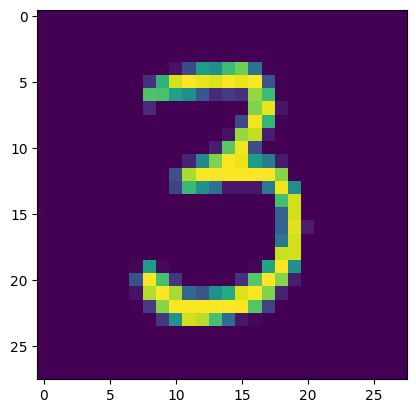

3


In [42]:
#displaying the image

plt.imshow(X_train[50])
plt.show()

# print the corresponding label

print(Y_train[50])

**Image Labels**

In [43]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [44]:
#unique value in  Y_train

print(np.unique(Y_train))

#unique value in  Y_test

print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


**We can use these labels as such or we can also apply one hot encoding**

**All images have same dimensions in this dataset, if not we have to resize all the images to a common dimension**

In [45]:
#SCALING THE VALUES

X_train=X_train/255
X_test=X_test/255


In [46]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Building Neural Network**

In [47]:
#setting layers for nbeural network

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),#output layer

])


In [48]:
#compiling   the neural network

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
#training the neural network

model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2932 - accuracy: 0.9164
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1419 - accuracy: 0.9581
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1052 - accuracy: 0.9676
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0852 - accuracy: 0.9733
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0717 - accuracy: 0.9772
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0603 - accuracy: 0.9811
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0530 - accuracy: 0.9830
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0467 - accuracy: 0.9855
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0421 - accuracy: 0.9862
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.036

Training Data accuracy====98.9 %

**Accuracy on test data**

In [50]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.0943 - accuracy: 0.9735
0.9735000133514404


**test data accuracy ---->  97.2%**

In [51]:
print(X_test.shape)

(10000, 28, 28)


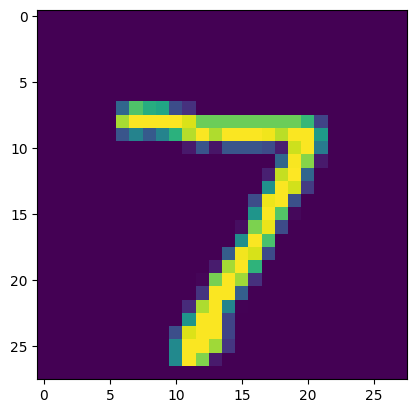

In [52]:
#first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [53]:
print(Y_test[0])

7


In [54]:
Y_pred=model.predict(X_test)

313/313 [==============================] - 0s 954us/step


In [55]:
print(Y_pred.shape)

(10000, 10)


In [56]:
print(Y_pred[0])

[4.2361668e-03 2.0550773e-01 6.8973750e-03 8.7112212e-01 1.6280998e-07
 1.3988895e-03 4.0747494e-09 9.9999386e-01 2.9047400e-02 4.3135503e-01]


**model.predict() GIVES PREDICTION PROPABILITY OF EACH CLASS FOR THAT DATA POINT**

In [57]:
#CONVERTING THE PREDICTION PROBABILITY INTO CLASS LABEL

label_for_first_test_image=np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [58]:
#CONVERTING THE PREDICTION PROBABILITY INTO CLASS LABEL FOR ALL TEST DATA POINTS
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 9, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [59]:
print(Y_pred)

[[4.23616683e-03 2.05507725e-01 6.89737499e-03 ... 9.99993861e-01
  2.90473998e-02 4.31355029e-01]
 [5.26459888e-02 9.66553688e-01 9.99999762e-01 ... 3.84923133e-08
  1.06557146e-01 2.93126988e-07]
 [1.73199631e-04 9.99959528e-01 2.08310813e-01 ... 3.62343103e-01
  1.75781980e-01 1.11348846e-03]
 ...
 [4.61594624e-10 2.57934385e-04 2.91263209e-08 ... 2.79837459e-01
  2.86620081e-04 9.99826849e-01]
 [1.51009635e-06 1.07290589e-05 1.77695270e-07 ... 2.07918329e-05
  9.73240972e-01 1.90035178e-04]
 [4.34300833e-04 3.25651579e-02 7.73090796e-05 ... 8.71003358e-09
  1.64565083e-03 1.43006889e-06]]


**Y_test---->true labels**

**Y_pred_labels--->predicted_labels**

**Confusion matrix**

In [60]:
conf_mat=confusion_matrix(Y_test,Y_pred_labels)

In [61]:
print(conf_mat)

tf.Tensor(
[[ 964    0    2    2    1    5    3    1    2    0]
 [   0 1129    2    0    0    2    1    0    1    0]
 [   4    2  994    4    8    0    4    7    8    1]
 [   1    1    2  988    0   11    0    6    1    0]
 [   1    1    0    1  952    2    3    5    1   16]
 [   1    1    0    2    1  878    4    1    1    3]
 [   3    3    0    1    2   12  935    2    0    0]
 [   0    8    9    7    0    0    0  991    1   12]
 [   5    1    1    9    4   20    1    3  928    2]
 [   2    6    0    3    9    6    0    5    2  976]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted_labels')

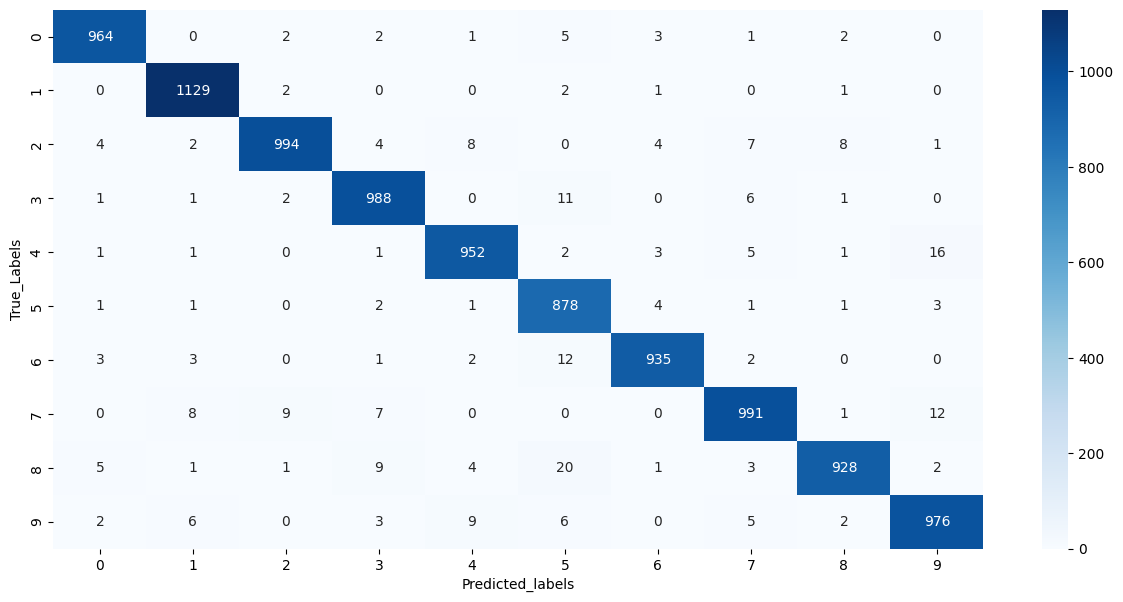

In [62]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True_Labels')
plt.xlabel('Predicted_labels')

**Building Predictive System**

In [63]:
input_image_path='/content/MNIST_digit.png'
input_image=cv2.imread(input_image_path)

In [64]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [65]:
type(input_image)

numpy.ndarray

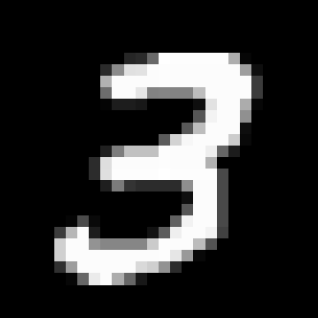

In [66]:
cv2_imshow((input_image))

In [67]:
input_image.shape

(318, 318, 3)

In [69]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)


In [70]:
grayscale.shape

(318, 318)

In [71]:
input_image_resize=cv2.resize(grayscale,(28,28))

In [73]:
input_image_resize.shape

(28, 28)

In [76]:
cv2_imshow(input_image_resize)

In [77]:
input_image_resize=input_image_resize/255

In [78]:
input_image_reshaped=np.reshape(input_image_resize,[1,28,28])

In [79]:
input_prediction=model.predict(input_image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 24ms/step
[[1.9984323e-09 9.3459308e-01 1.9384391e-04 1.0000000e+00 1.6656927e-14
  2.9160986e-02 1.5173609e-16 5.3286640e-04 1.0867577e-02 7.2967008e-02]]


In [80]:
input_prediction_label=np.argmax(input_prediction)

In [81]:
print(input_prediction_label)

3


**Predictive System**

Path of the image to be predicted/content/MNIST_digit.png


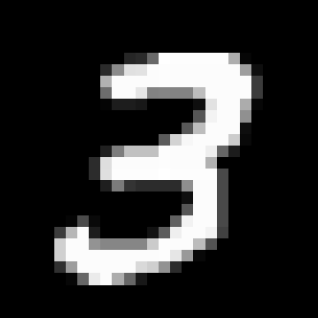

1/1 [==============================] - 0s 14ms/step
The handwritten digit is recongnised as : 3


In [82]:
input_image_path=input('Path of the image to be predicted')

input_image=cv2.imread(input_image_path)

cv2_imshow((input_image))

grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_image_resize=cv2.resize(grayscale,(28,28))

input_image_resize=input_image_resize/255

input_image_reshaped=np.reshape(input_image_resize,[1,28,28])

input_prediction=model.predict(input_image_reshaped)

input_prediction_label=np.argmax(input_prediction)

print('The handwritten digit is recongnised as :',input_prediction_label)